In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam


In [3]:

# Load dataset
df = pd.read_csv('stock_data.csv')
# Display first 5 rows of dataset
print("📄 First 5 rows of the dataset:")
print(df.head())



📄 First 5 rows of the dataset:
       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800


In [5]:

# Clean 'Close' column
df['Close'] = df['Close'].str.replace(',', '')
df['Close'] = df['Close'].astype(float)

# Prepare data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


In [7]:

# Create sequences
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)


In [9]:

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.fit(X, y, epochs=20, batch_size=32, verbose=1)


C:\Users\satya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0457
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0045
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0031
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0041
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0022
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0031
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0028
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0021
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0014
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0019
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0015
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0018
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0012
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0015
Epoch 15/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 9.7021e-04


In [17]:

# Predict on training data
train_predictions = model.predict(X)
train_predictions_inv = scaler.inverse_transform(train_predictions)
y_inv = scaler.inverse_transform(y.reshape(-1, 1))

# Evaluation metrics
mae = mean_absolute_error(y_inv, train_predictions_inv)
mse = mean_squared_error(y_inv, train_predictions_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_inv, train_predictions_inv)

# Custom accuracy (within ±5%)
tolerance = 0.05
within_tolerance = np.abs(train_predictions_inv - y_inv) / y_inv < tolerance
accuracy = np.mean(within_tolerance) * 100

# Print evaluation
print("\n📊 Evaluation on Training Data:")
print(f"MAE         = {mae:.4f}")
print(f"MSE         = {mse:.4f}")
print(f"RMSE        = {rmse:.4f}")
print(f"R² Score    = {r2:.4f}")
print(f"Accuracy (within ±5%) = {accuracy:.2f}%")


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step

📊 Evaluation on Training Data:
MAE         = 12.5699
MSE         = 667.9325
RMSE        = 25.8444
R² Score    = 0.9761
Accuracy (within ±5%) = 96.41%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step

📅 Predicted vs Actual (Last 10 Days)
Day 1: Predicted Value = 783.39, Actual Value = 790.80
Day 2: Predicted Value = 781.34, Actual Value = 794.20
Day 3: Predicted Value = 780.35, Actual Value = 796.42
Day 4: Predicted Value = 779.91, Actual Value = 794.56
Day 5: Predicted Value = 779.76, Actual Value = 791.26
Day 6: Predicted Value = 779.78, Actual Value = 789.91
Day 7: Predicted Value = 779.90, Actual Value = 791.55
Day 8: Predicted Value = 780.07, Actual Value = 785.05
Day 9: Predicted Value = 780.28, Actual Value = 782.79
Day 10: Predicted Value = 780.50, Actual Value = 771.82


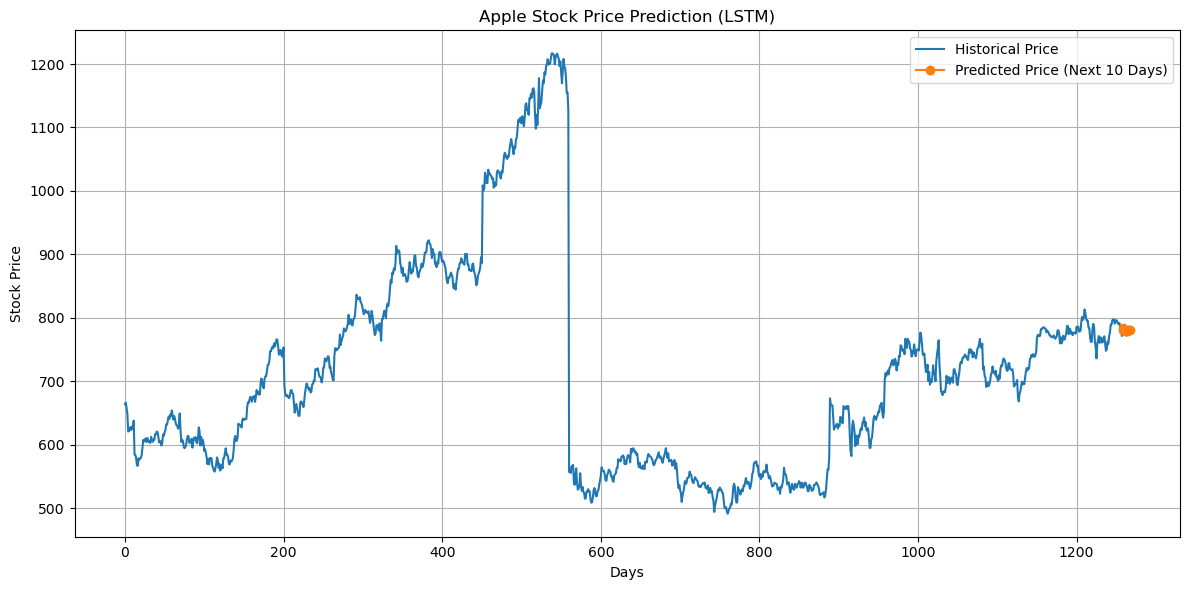

In [15]:

# Predict next 10 days
last_sequence = scaled_data[-sequence_length:]
predictions = []

for _ in range(10):
    input_seq = last_sequence.reshape(1, sequence_length, 1)
    next_pred = model.predict(input_seq)[0]
    predictions.append(next_pred)
    last_sequence = np.append(last_sequence[1:], [next_pred], axis=0)

# Inverse transform predictions
predicted_prices = scaler.inverse_transform(predictions)

# Get actual values for the last 10 days
actual_values = data[-10:]

# Print formatted predicted vs actual output
print("\n📅 Predicted vs Actual (Last 10 Days)")
for i in range(10):
    predicted = predicted_prices[i][0]
    actual = actual_values[i][0]
    print(f"Day {i+1}: Predicted Value = {predicted:.2f}, Actual Value = {actual:.2f}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(range(len(data)), scaler.inverse_transform(scaled_data), label='Historical Price')
plt.plot(range(len(data), len(data)+10), predicted_prices, label='Predicted Price (Next 10 Days)', marker='o')
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Apple Stock Price Prediction (LSTM)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

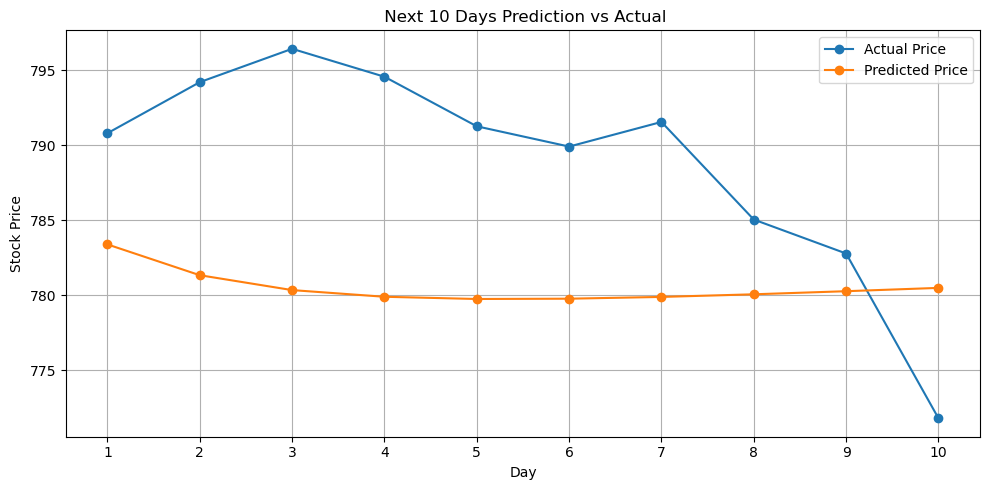

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), actual_values, label='Actual Price', marker='o')
plt.plot(range(1, 11), predicted_prices, label='Predicted Price', marker='o')
plt.title(" Next 10 Days Prediction vs Actual")
plt.xlabel("Day")
plt.ylabel("Stock Price")
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
